Detection of Forest with Fire

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


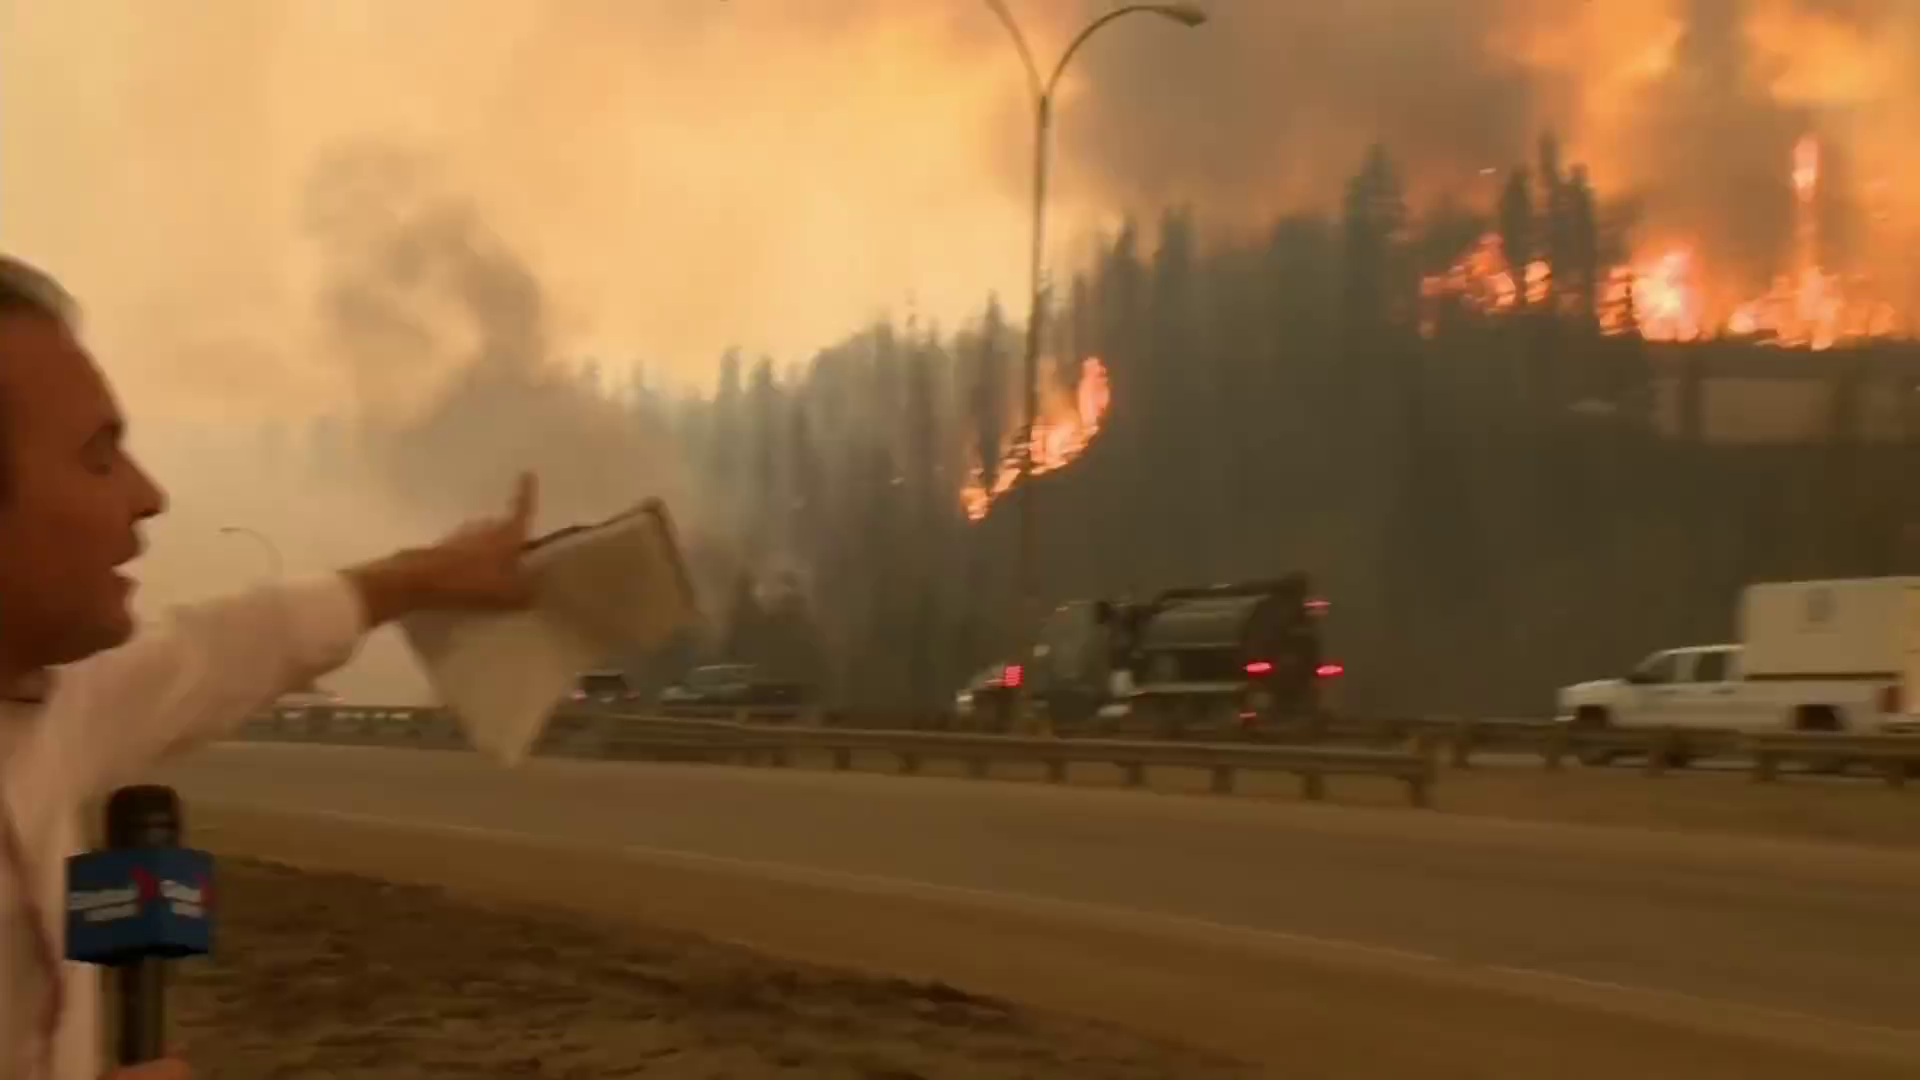

1/1 [==============================] - 0s 128ms/step
Forest fire


In [27]:
#Importing the necessary libraries
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a Video object and read from input file
# If the input is the camera, pass 0 instead of the video file name
video = cv2.VideoCapture('/content/drive/MyDrive/Caught_on_camera__Fort_McMurray_fire_erupts_behind_Global_News_reporter(1080p)(0).mp4')
 
# Check if camera opened successfully
if (video.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(video.isOpened()):
  # video frame-by-frame
  ret, frame = video.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/forest1 (2).h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video video object
video.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [28]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  #Unique credentials for each individual users
  account_sid='ACbd262485b92b4d4fe5a1078bd227c786'
  auth_token='6faba69d72fb4b317e62f37bacdb7e50'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #Twilio contact number
      from_='+17128008239',
      #To our cell number
      to='+918072020392')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

Forest fire
SM65d64185d93f13e015975a966c9e9178
Fire detected
SMS Sent!
